In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras import layers, Sequential
import random


2022-03-01 15:36:45.509707: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-01 15:36:45.509773: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [5]:
absolute_path = os.path.dirname(os.path.dirname(os.getcwd()))
path = absolute_path + "/raw_data"
path

'/home/christophelanson/code/christophelanson/icangetyoursmile/raw_data'

In [6]:
number = 10
str(number).zfill(4)

'0010'

In [26]:
def get_dataset(path, sample_size=500, image_size=(64,64), random_seed=1):
    """
    get a dataset of images of required size, randomly selected
    returns X (masked images), y (unmasked images of the same faces), and a sample test set of 5 images
    path to data : ..../raw_data
    the function then completes the path by adding : 64x64/Mask or No_mask (or 256x256/Mask etc.)
    """
    path = f'{path}/{image_size[0]}x{image_size[1]}/'
    print(f'Loading data from {path}...')
    random.seed(random_seed)
    data_size = sample_size
    X = []
    y = []
    X_test = []
    for number in range(data_size):
        rand_img_nb = random.randint(0,9999)
        no_mask_path = f'{path}No_mask/seed{str(rand_img_nb).zfill(4)}.png'
        no_mask_im = np.asarray(Image.open(no_mask_path)).tolist()
        mask_path = f'{path}Mask/with-mask-default-mask-seed{str(rand_img_nb).zfill(4)}.png'
        mask_im = np.asarray(Image.open(mask_path)).tolist()
        X.append(mask_im)
        y.append(no_mask_im)
    for number in range(5):
        rand_img_nb = random.randint(0,9999)
        mask_path = f'{path}Mask/with-mask-default-mask-seed{str(rand_img_nb).zfill(4)}.png'
        mask_im = np.asarray(Image.open(mask_path)).tolist()
        X_test.append(mask_im)
    print('Done')
    print(f'X shape : {np.asarray(X).shape}')
    print(f'y shape : {np.asarray(y).shape}')
    print(f'X_test shape : {np.asarray(X_test).shape}')
    return X, y, X_test

In [27]:
X, y, X_test = get_dataset(path, sample_size= 100)

Loading data from /home/christophelanson/code/christophelanson/icangetyoursmile/raw_data/64x64/...
Done
X shape :(100, 64, 64, 3)
y shape :(100, 64, 64, 3)
X_test shape :(5, 64, 64, 3)


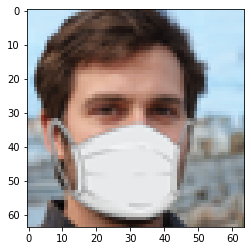

In [28]:
plt.imshow(X_test[0])

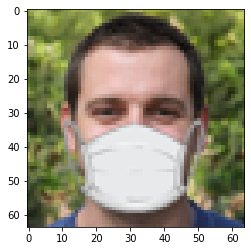

In [31]:
plt.imshow(X[20])

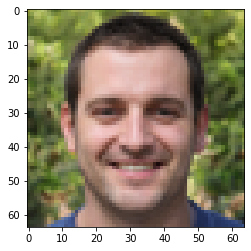

In [32]:
plt.imshow(y[20])

In [33]:
from icangetyoursmile.models import unet

In [34]:
model = unet()

2022-03-01 16:02:27.740891: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-01 16:02:27.740975: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-01 16:02:27.740993: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (HP-CL): /proc/driver/nvidia/version does not exist
2022-03-01 16:02:27.741424: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [170]:
#model.summary()

In [38]:
results = model.fit(X, y, batch_size=8, epochs=50)

Epoch 1/50
 3/13 [=====>........................] - ETA: 0s - loss: 25252.8750

2022-03-01 16:05:34.673918: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 22937600 exceeds 10% of free system memory.
2022-03-01 16:05:34.674016: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 22937600 exceeds 10% of free system memory.
2022-03-01 16:05:34.674855: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 28311552 exceeds 10% of free system memory.
2022-03-01 16:05:34.674874: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 28311552 exceeds 10% of free system memory.
2022-03-01 16:05:34.682581: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 30670848 exceeds 10% of free system memory.


13/13 [==============================] - 2s 60ms/step - loss: 22265.4023
Epoch 2/50
13/13 [==============================] - 1s 56ms/step - loss: 12364.4346
Epoch 3/50
13/13 [==============================] - 1s 56ms/step - loss: 6698.6479
Epoch 4/50
13/13 [==============================] - 1s 63ms/step - loss: 5104.3198
Epoch 5/50
13/13 [==============================] - 1s 56ms/step - loss: 4375.2339
Epoch 6/50
13/13 [==============================] - 1s 55ms/step - loss: 3944.9731
Epoch 7/50
13/13 [==============================] - 1s 57ms/step - loss: 3615.0640
Epoch 8/50
13/13 [==============================] - 1s 56ms/step - loss: 3303.5312
Epoch 9/50
13/13 [==============================] - 1s 60ms/step - loss: 3098.0615
Epoch 10/50
13/13 [==============================] - 1s 57ms/step - loss: 2890.7151
Epoch 11/50
13/13 [==============================] - 1s 53ms/step - loss: 2694.2144
Epoch 12/50
13/13 [==============================] - 1s 53ms/step - loss: 2524.3662
Epoch 13/5

In [179]:
#model.evaluate(X_train,y_train)

In [39]:
np.asarray(X_test).shape

(5, 64, 64, 3)

In [46]:
y_pred = model.predict(X_test).astype(np.uint8)

In [51]:
def plot_results(X_test, y_pred):
    plt.figure(figsize=(20,10))
    nb_graphs = len(X_test)
    for graph_nb in range(nb_graphs):
        plt.subplot(2,nb_graphs, graph_nb+1)
        plt.imshow(X_test[graph_nb])
        plt.subplot(2,nb_graphs, graph_nb +1 +nb_graphs)
        plt.imshow(y_pred[graph_nb])

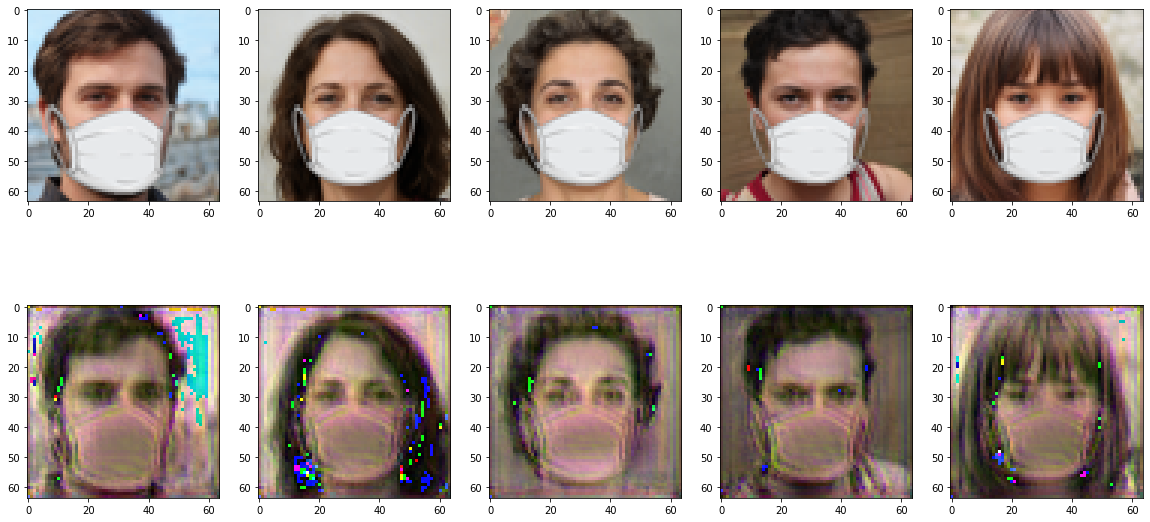

In [52]:
plot_results(X_test, y_pred)